In [1]:
import os
os.getcwd()

'C:\\Users\\ASUS  N551JW'

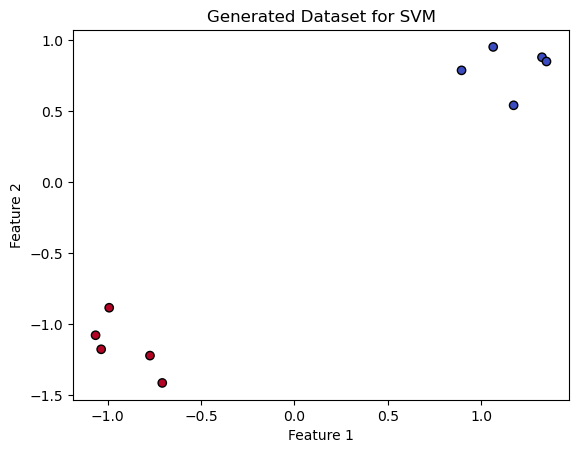

In [15]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

# Generate 2D dataset
centers = [(1, 1), (-1, -1)]  # centers for two clusters
cluster_std = [0.2, 0.2]      # standard deviation of clusters
X, Y = make_blobs(n_samples=10, cluster_std=cluster_std, centers=centers,
                  n_features=2, random_state=1)

# Change labels from (0, 1) to (-1, 1)
Y = np.where(Y == 0, -1, 1)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='coolwarm', edgecolors='k')
plt.title("Generated Dataset for SVM")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

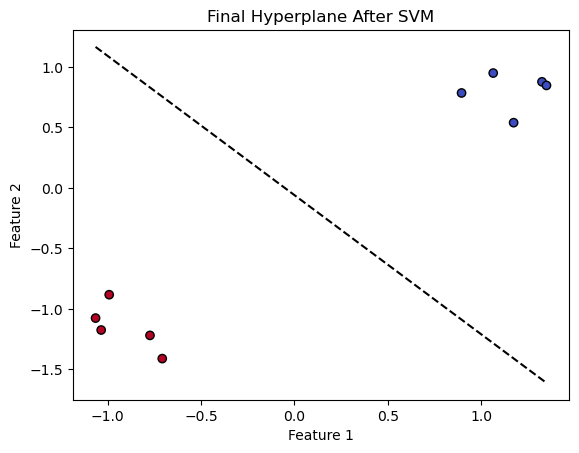

In [16]:
lr = 0.1           
fe = 0.9           
fr = 1.1           
max_iter = 1000    
margin_threshold = 0.1  

X_ext = np.hstack((X, np.ones((X.shape[0], 1))))

w = np.random.randn(X_ext.shape[1])

for iteration in range(max_iter):
    for i, (x, y) in enumerate(zip(X_ext, Y)):
        margin = y * np.dot(w, x)
        if margin < 1: 
            w += lr * y * x
        else:  
            if margin < 1 + margin_threshold:  
                w += lr * fr * y * x
            elif margin > 1 + margin_threshold:  
                w *= fe

def plot_hyperplane(w, X, Y):
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='coolwarm', edgecolors='k')
    slope = -w[0] / w[1]
    intercept = -w[2] / w[1]
    x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    y_vals = slope * x_vals + intercept
    plt.plot(x_vals, y_vals, 'k--')
    plt.title("Final Hyperplane After SVM")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_hyperplane(w, X, Y)

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("CTG.csv")

print(data.head()) 
print(data.info())  
print(data.describe())  

features = ['LBE', 'LB', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Min', 'Max', 'Mode', 'Mean', 'Median']
target = 'NSP'

X = data[features]
y = data[target]

print("Class Distribution:")
print(y.value_counts())

print(f"Missing values in NSP: {y.isna().sum()}")

data = data.dropna(subset=[target])  

X = data[features]
y = data[target]

print(f"Missing values after cleaning: {y.isna().sum()}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=777)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

       FileName       Date      SegFile      b       e    LBE     LB   AC  \
0  Variab10.txt  12/1/1996  CTG0001.txt  240.0   357.0  120.0  120.0  0.0   
1    Fmcs_1.txt   5/3/1996  CTG0002.txt    5.0   632.0  132.0  132.0  4.0   
2    Fmcs_1.txt   5/3/1996  CTG0003.txt  177.0   779.0  133.0  133.0  2.0   
3    Fmcs_1.txt   5/3/1996  CTG0004.txt  411.0  1192.0  134.0  134.0  2.0   
4    Fmcs_1.txt   5/3/1996  CTG0005.txt  533.0  1147.0  132.0  132.0  4.0   

    FM   UC  ...    C    D    E   AD   DE   LD   FS  SUSP  CLASS  NSP  
0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0   0.0    9.0  2.0  
1  0.0  4.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0    6.0  1.0  
2  0.0  5.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0    6.0  1.0  
3  0.0  6.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0    6.0  1.0  
4  0.0  5.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    2.0  1.0  

[5 rows x 40 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data col

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Linear kernel SVM
svm_linear = SVC(kernel='linear', C=1.0, random_state=42)
svm_linear.fit(X_train, y_train)

y_pred_linear = svm_linear.predict(X_test)

print("SVM with Linear Kernel:")
print(classification_report(y_test, y_pred_linear))
print(f"Accuracy: {accuracy_score(y_test, y_pred_linear):.2f}")

SVM with Linear Kernel:
              precision    recall  f1-score   support

         1.0       0.92      0.93      0.93       332
         2.0       0.60      0.53      0.56        59
         3.0       0.75      0.77      0.76        35

    accuracy                           0.86       426
   macro avg       0.75      0.74      0.75       426
weighted avg       0.86      0.86      0.86       426

Accuracy: 0.86


In [8]:
# Polynomial kernel SVM
svm_poly = SVC(kernel='poly', degree=3, C=1.0, random_state=42)
svm_poly.fit(X_train, y_train)

y_pred_poly = svm_poly.predict(X_test)

print("SVM with Polynomial Kernel:")
print(classification_report(y_test, y_pred_poly))
print(f"Accuracy: {accuracy_score(y_test, y_pred_poly):.2f}")

SVM with Polynomial Kernel:
              precision    recall  f1-score   support

         1.0       0.88      0.98      0.93       332
         2.0       0.71      0.41      0.52        59
         3.0       1.00      0.66      0.79        35

    accuracy                           0.88       426
   macro avg       0.86      0.68      0.75       426
weighted avg       0.87      0.88      0.86       426

Accuracy: 0.88


In [9]:
# RBF kernel SVM
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_rbf.fit(X_train, y_train)

y_pred_rbf = svm_rbf.predict(X_test)

print("SVM with RBF Kernel:")
print(classification_report(y_test, y_pred_rbf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rbf):.2f}")

SVM with RBF Kernel:
              precision    recall  f1-score   support

         1.0       0.91      0.96      0.94       332
         2.0       0.67      0.59      0.63        59
         3.0       1.00      0.66      0.79        35

    accuracy                           0.89       426
   macro avg       0.86      0.74      0.79       426
weighted avg       0.89      0.89      0.88       426

Accuracy: 0.89


In [10]:
# Sigmoid kernel SVM
svm_sigmoid = SVC(kernel='sigmoid', C=1.0, gamma='scale', random_state=42)
svm_sigmoid.fit(X_train, y_train)

y_pred_sigmoid = svm_sigmoid.predict(X_test)

print("SVM with Sigmoid Kernel:")
print(classification_report(y_test, y_pred_sigmoid))
print(f"Accuracy: {accuracy_score(y_test, y_pred_sigmoid):.2f}")

SVM with Sigmoid Kernel:
              precision    recall  f1-score   support

         1.0       0.81      0.86      0.84       332
         2.0       0.42      0.22      0.29        59
         3.0       0.21      0.26      0.23        35

    accuracy                           0.72       426
   macro avg       0.48      0.45      0.45       426
weighted avg       0.71      0.72      0.71       426

Accuracy: 0.72


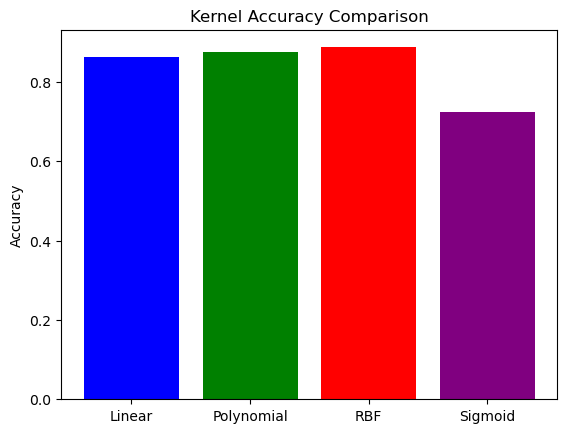

In [11]:
import matplotlib.pyplot as plt

accuracy_scores = {
    "Linear": accuracy_score(y_test, y_pred_linear),
    "Polynomial": accuracy_score(y_test, y_pred_poly),
    "RBF": accuracy_score(y_test, y_pred_rbf),
    "Sigmoid": accuracy_score(y_test, y_pred_sigmoid),
}

plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green', 'red', 'purple'])
plt.title("Kernel Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import numpy as np

# Generate example data (replace with your dataset)
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the classifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50),  # Depth and width of the network
                    solver='adam',                 # Solver
                    alpha=0.0001,                 # Regularization strength
                    batch_size=32,                # Batch size
                    learning_rate_init=0.001,     # Initial learning rate
                    max_iter=200,                 # Termination of training
                    random_state=42)

# Train the model
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       145
           1       0.85      0.84      0.84       155

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



In [23]:
print(y_train[:10])

2125    1.0
920     1.0
1817    1.0
795     2.0
153     1.0
1554    1.0
676     1.0
507     1.0
1435    1.0
863     1.0
Name: NSP, dtype: float64


In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

data = pd.read_csv("CTG.csv")

features = ['LBE', 'LB', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Min', 'Max', 'Mode', 'Mean', 'Median']
target = 'NSP'

data = data.dropna(subset=[target])  

X = data[features]
y = data[target]

y=y-1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=777)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)  # Use .values for conversion
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)



train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_sizes[0])
        self.fc2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
        self.fc3 = nn.Linear(hidden_sizes[1], output_size)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.softmax(self.fc3(x))
        return x

input_size = X_train.shape[1]
hidden_sizes = [100, 50]
output_size = 3  
model = NeuralNet(input_size, hidden_sizes, output_size)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(20):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

model.eval()
y_pred = []
with torch.no_grad():
    for X_batch, _ in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.numpy())

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Epoch 1, Loss: 0.8095174431800842
Epoch 2, Loss: 0.7959628701210022
Epoch 3, Loss: 0.6407902836799622
Epoch 4, Loss: 0.7437669038772583
Epoch 5, Loss: 0.8281978964805603
Epoch 6, Loss: 0.7311190962791443
Epoch 7, Loss: 0.7212770581245422
Epoch 8, Loss: 0.6271446347236633
Epoch 9, Loss: 0.7321809530258179
Epoch 10, Loss: 0.5902997851371765
Epoch 11, Loss: 0.5606246590614319
Epoch 12, Loss: 0.8619006872177124
Epoch 13, Loss: 0.5652238130569458
Epoch 14, Loss: 0.5780987739562988
Epoch 15, Loss: 0.6233509182929993
Epoch 16, Loss: 0.6941980123519897
Epoch 17, Loss: 0.6363559365272522
Epoch 18, Loss: 0.7252864837646484
Epoch 19, Loss: 0.7000348567962646
Epoch 20, Loss: 0.7544423341751099
Accuracy: 0.9043887147335423
